In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-data/newData.csv


In [2]:
import pickle

In [3]:
df =pd.read_csv("../input/twitter-data/newData.csv") 

In [4]:
df.describe()

,Unnamed: 0,label_int,newLabel
count,567758.000000,567758.000000,567758.000000
mean,283878.500000,35.540061,2.992035
std,163897.761405,17.067480,1.882829
min,0.000000,0.000000,1.000000
25%,141939.250000,26.000000,1.000000
50%,283878.500000,34.000000,3.000000
75%,425817.750000,53.000000,4.000000
max,567757.000000,63.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567758 entries, 0 to 567757
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      567758 non-null  int64 
 1   pre_punc        567758 non-null  object
 2   label_int       567758 non-null  int64 
 3   label_to_emoji  567758 non-null  object
 4   newLabel        567758 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 21.7+ MB


In [6]:
corpus = df.pre_punc.to_list()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [8]:
len(v.vocabulary_)

108416

In [9]:
print(transform_output.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
df

,Unnamed: 0,pre_punc,label_int,label_to_emoji,newLabel
0,0,what s this old bit bertie you re still a spri...,26,😂,1
1,1,of in what way ! ? or is that a silly question...,59,😳,7
2,2,how doe the man survive ? you are spot on when...,29,😅,1
3,3,come back to me when cox can hook up with some...,33,😉,1
4,4,my parent don t even know about my relationshi...,11,💀,6
...,...,...,...,...,...
567753,567753,its april fools day today . . . . fake news wi...,26,😂,1
567754,567754,happy birthday to our football club formed on ...,3,🎉,1
567755,567755,thank you for bringing awareness . this is ter...,50,😢,4
567756,567756,wtf you also know berserk damn one of my fav s...,38,😎,1


In [11]:
df['newLabel'].value_counts()

1    219066
4    167300
5     60813
2     45818
6     27294
7     27155
3     20312
Name: newLabel, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.pre_punc, 
    df.newLabel, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.newLabel
)

In [13]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (454206,)
Shape of X_test:  (113552,)


In [14]:
X_train.head()

379633    i should most definitely uninstall this app . ...
42768     number percent ? ? ? have you seen dream antis...
142862    she should be . her podium is a loud a it will...
411477    to song wrapped around your finger by number s...
66853     lot of acc are deactivating and going priv let...
Name: pre_punc, dtype: object

In [15]:
y_train.value_counts()

1    175253
4    133840
5     48650
2     36654
6     21835
7     21724
3     16250
Name: newLabel, dtype: int64

In [16]:
y_test.value_counts()

1    43813
4    33460
5    12163
2     9164
6     5459
7     5431
3     4062
Name: newLabel, dtype: int64

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))
filename = 'KNN.sav'
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

           1       0.39      0.71      0.51     43813
           2       0.18      0.14      0.16      9164
           3       0.15      0.00      0.00      4062
           4       0.50      0.03      0.05     33460
           5       0.16      0.08      0.10     12163
           6       0.05      0.18      0.08      5459
           7       0.14      0.00      0.01      5431

    accuracy                           0.31    113552
   macro avg       0.23      0.16      0.13    113552
weighted avg       0.35      0.31      0.24    113552



In [18]:
X_test[:2]

444033    i hope if i decided to get married my husband ...
186917    i thought so but wasn t sure . i need to do my...
Name: pre_punc, dtype: object

In [19]:
y_test[:2]

444033    1
186917    5
Name: newLabel, dtype: int64

In [20]:
y_pred[:2]

array([6, 6])

In [21]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

filename = 'NaiveBayes.sav'
pickle.dump(clf, open(filename, 'wb'))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.44      0.87      0.58     43813
           2       0.70      0.03      0.06      9164
           3       0.00      0.00      0.00      4062
           4       0.53      0.40      0.46     33460
           5       0.70      0.02      0.04     12163
           6       1.00      0.00      0.00      5459
           7       0.00      0.00      0.00      5431

    accuracy                           0.46    113552
   macro avg       0.48      0.19      0.16    113552
weighted avg       0.50      0.46      0.37    113552



In [22]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

filename = 'RandomForest.sav'
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

           1       0.44      0.83      0.58     43813
           2       0.64      0.15      0.24      9164
           3       1.00      0.01      0.01      4062
           4       0.51      0.42      0.46     33460
           5       0.70      0.04      0.07     12163
           6       0.75      0.02      0.03      5459
           7       0.80      0.00      0.01      5431

    accuracy                           0.46    113552
   macro avg       0.69      0.21      0.20    113552
weighted avg       0.56      0.46      0.39    113552



In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Truth')

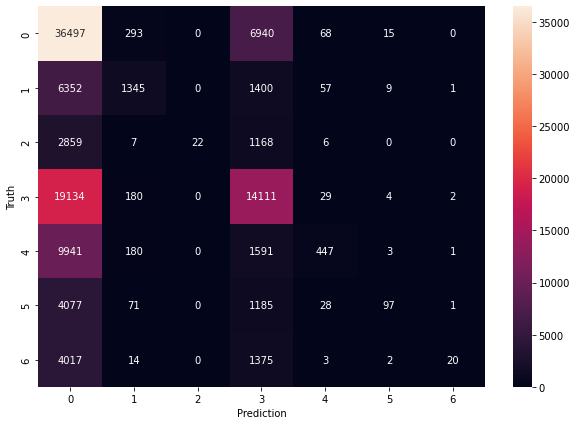

In [24]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')